In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import itertools as it

<b>Problem 1</b>: For a 3 $\times$ 3 lattice, there are $2^9$ configurations possible.

In [2]:
configs = 2**9
print(configs)
#print(np.permutation(9,2))

512


In [3]:
def is_in(item, array):
    """
    This function returns true if the given item is in the
    array and false if the given item is not in the array.
    """
    value = False
    ctr = 0
    while((value is False) and (ctr < array.shape[-1])):
        if (array[ctr] == item):
            value = True
        ctr += 1
    return value

In [4]:
a = "1111"
print([char for char in a])

['1', '1', '1', '1']


In [5]:
def list_to_array(some_list, dim):
    length = len(some_list)
    temp = []
    for i in some_list:
        i.split()  
    array = np.zeros()

In [6]:
# testing my function that tests if an element is in an array
A = np.array([1, 2, 3, 4, 5, 6])
print(is_in(8, A))

False


In [7]:
def create_lattices(dim=3):
    """
    This function creates a dim x dim spin lattice.
    Returns a tensor of dimension dim x dim x dim^2.
    """
    # total elements for each lattice and the possible spins
    n2 = dim * dim
    spins = ['1', '0']

    # total configuration number and the possible configurations
    configs = 2**n2
    possible_configs = ["".join(item) for item in it.product(spins, repeat=n2)]

    # populating the spin tensor
    spin_tensor = np.zeros([dim, dim, configs], float)
    for k in range(configs):
        config_temp = possible_configs[k]
        temp = [char for char in config_temp] # parses the characters
        array_temp = np.array(temp, float) # convert from list to array
        reshaped = np.reshape(array_temp, (3, 3)) # reshape the list
        spin_tensor[:, :, k] = np.where(reshaped == 0, -1, reshaped)

    return spin_tensor

In [8]:
def nn(lat, r, c):
    # the number of rows/columns in the lattice
    dim = int(lat.shape[0])

    # the spin at a given index in the lattice
    spin = lat[r, c]

    # get the spins of the neighbors above and below
    up = lat[r-1, c]
    down = lat[(r+1)%dim, c]

    # get the spins of the right and left neighbors
    right = lat[r, (c+1)%dim]
    left = lat[r, c-1]

    # return the sum
    total = spin * (up + down + left + right)

    return total

In [9]:
def hammy(J, H, lattice):
    dim = lattice.shape[0]
    nn_sum = 0.0
    for j in range(dim):
        for k in range(dim):
            nn_sum = nn(lattice, j, k)

    term1 = - J * nn_sum
    term2 = - H * np.sum(lattice)

    return term1 + term2

In [15]:
def f1(theta, T, J, kb=1.0):
    beta = 1.0 / (T * kb)
    k = 1.0 / (np.sinh(2.0 * beta * J))**2
    
    denom = (1 - 4 * k / (1 + k)**2 * (np.sin(theta))**2)
    integrand = np.sqrt(1.0 / denom)

    return integrand

In [10]:
# create the lattice
lattices = create_lattices()

In [11]:
J, H = 1.0, 0.0
lo_T, hi_T = 0.1, 1000.0
Q_lo_T = 0.0
Q_hi_T = 0.0
avg_lo = 0.0
avg_hi = 0.0

for k in range(configs):
    lattice = lattices[:, :, k]
    ham = hammy(J, H, lattice)
    lo_exp = np.exp(- ham / lo_T)
    avg_lo += ham * lo_exp
    Q_lo_T += lo_exp

    hi_exp = np.exp(- ham / hi_T)
    avg_hi += ham * hi_exp
    Q_hi_T += hi_exp

avg_lo /= Q_lo_T
avg_hi /= Q_hi_T

print(avg_lo)
print(avg_hi)

-3.9999999835107736
-0.0039999986666672096


In [29]:
J = 1.0
lb = 0.1
ub = 50.0
dt = 0.5
kb = 1.0
T_array = np.arange(lb, ub, dt)
int_array = np.zeros_like(T_array, float)
E_array = np.zeros_like(T_array, float)
for k in range(len(T_array)):
    T = T_array[k]
    beta = 1.0 / (kb * T)
    val = integrate.quad(lambda x: f1(x, T, J), 0.0, np.pi / 2)
    int_array[k] = np.sum(val)
    temp2 = (2.0 * np.tanh(2 * beta * J))**2 - 1
    temp3 = 1.0 + 2.0 * temp2 / np.pi * np.sum(val)
    temp4 = - J * 1 / np.tanh(2 * beta * J) * temp3
    E_array[k] = temp4

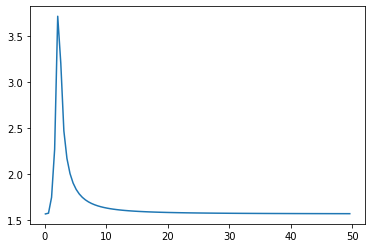

In [30]:
plt.plot(T_array, int_array)
plt.show()

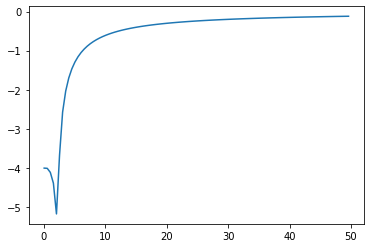

In [36]:
plt.plot(T_array, E_array)
plt.show()